In [6]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [7]:
TRAINING_FILE = './data/sign_mnist_train.csv'
VALIDATION_FILE = './data/sign_mnist_test.csv'

In [10]:
def parse_data_from_input(filename):
    with open(filename) as file:

        reader = csv.reader(file, delimiter=',')
        imgs = []
        labels = []

        next(reader, None)

        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)

    return images, labels

In [11]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (27455, 28, 28) and dtype: float64
Training labels has shape: (27455,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


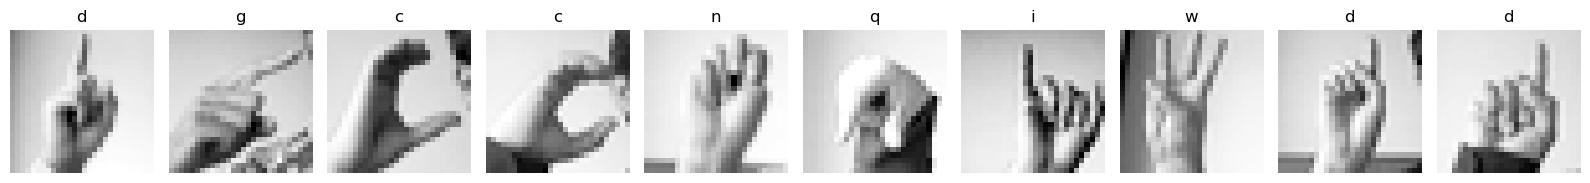

In [12]:
# plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [13]:
#creating the generators for the CNN
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)
    
    train_datagen = ImageDataGenerator(rescale = 1./255.)
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)
    
    validation_datagen = ImageDataGenerator(rescale = 1./255.)
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

    return train_generator, validation_generator

In [14]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

In [17]:
#the model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])


    model.compile(optimizer ='rmsprop',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [18]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 57s 61ms/step - loss: 0.7353 - accuracy: 0.7718 - val_loss: 0.3645 - val_accuracy: 0.8928
Epoch 2/15
858/858 [==============================] - 52s 60ms/step - loss: 0.0632 - accuracy: 0.9792 - val_loss: 0.2616 - val_accuracy: 0.9162
Epoch 3/15
858/858 [==============================] - 51s 59ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.2659 - val_accuracy: 0.9367
Epoch 4/15
858/858 [==============================] - 53s 62ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.3545 - val_accuracy: 0.9313
Epoch 5/15
858/858 [==============================] - 51s 60ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.2747 - val_accuracy: 0.9378
Epoch 6/15
858/858 [==============================] - 54s 62ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.4584 - val_accuracy: 0.9314
Epoch 7/15
858/858 [==============================] - 52s 60ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.3140 - val_accuracy:

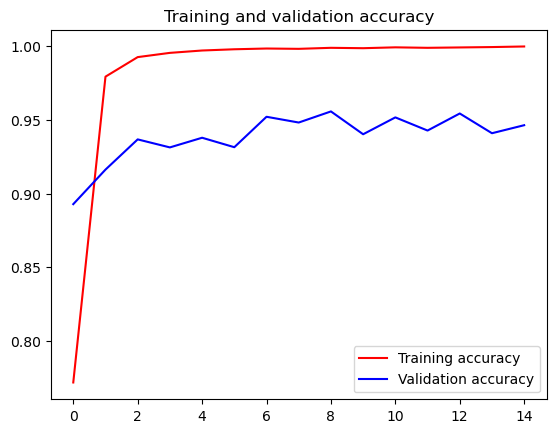

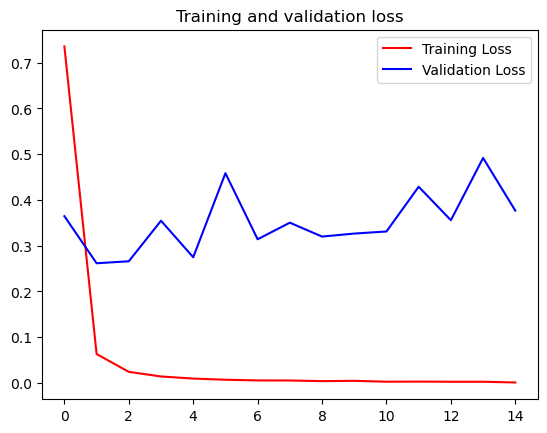

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()